# Case Study:  Analyze data to predict who will Survive the Titanic

Part 3:  Complete this tutorial (Steps 14&15) and then use what you learn to create your own case study.
The data set is available in Weekly Resources/Data


14.	Training - Split your data into two sets:  Training and Testing.  
15.	 Evaluation – Remember, we are trying to predict if a passenger has survived or not so this is a classification problem.  There are many algorithms that could be used but we’re going to use logistic regression.  
a.	Metrics for the evaluation:  
i.	Confusion Matrix  (you should get 84% - pretty good)
ii.	Precision, Recall & F1 score (all 3 were very good)
iii.	ROC curve (the dotted line is the randomly guessed so anything above that is good metric)

In [10]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = pd.read_csv("train.csv")

In [3]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)
fill_na_median(data['Age'])

In [27]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

In [28]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

## Part 3 of The Titanic Case Study

This is the part that I was wondering how it works, now I understand, in this step we have to put together the numercial and dummie fetures to be able to split the data set into training set and test set

In [29]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

In [ ]:
I had to add the following code to see how this concatenation of fetaures looks like

In [42]:
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In the following code the author is creating the target data set, using of course our target variable "Survived" of the data set

In [30]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
# separate data into training and validation and check the details of the datasets
# import packages

In [43]:
from sklearn.model_selection import train_test_split

Next spliting the data into training and validation sets, this is the most important step in the evaluation of the model, we need to set a test data set that the model has never seen before

In [32]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)


checking the samples

In [33]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])


No. of samples in training set:  623
No. of samples in validation set: 268


In [34]:
# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())
print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())




No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


In [35]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


Author chose Logisitic regression because is a classification problem, who does survives and who does not

In [45]:
# Instantiate the classification model 
model = LogisticRegression()


C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


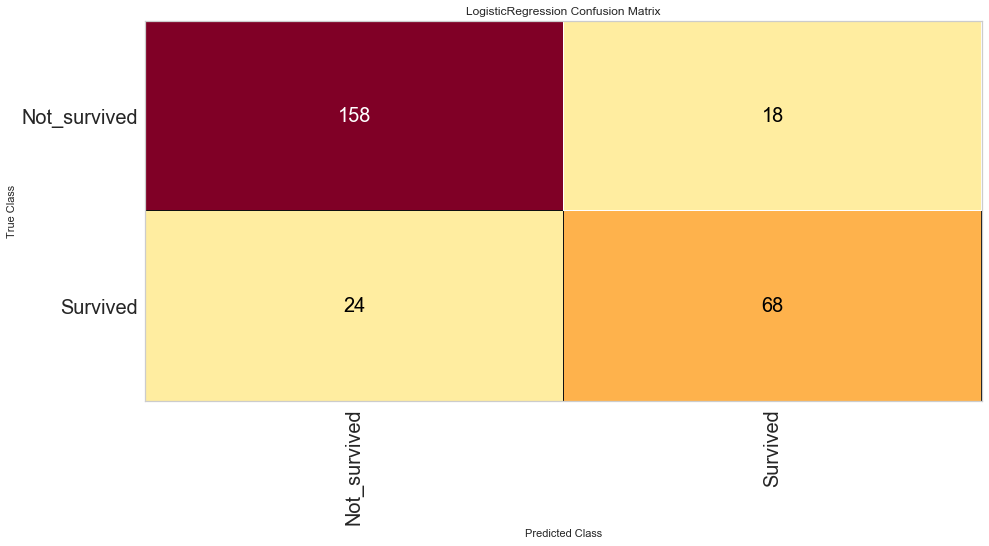

In [46]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
#How did we do?
cm.poof()


The confusion matrix above show us how the model perform, we can see that we had 158 predictions that were correct and only 24 that were wrong, in my opinion that is not bad, looking at the second class 68 observations were predicted correctly and 18 were not, the model in this second class did not do so well

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


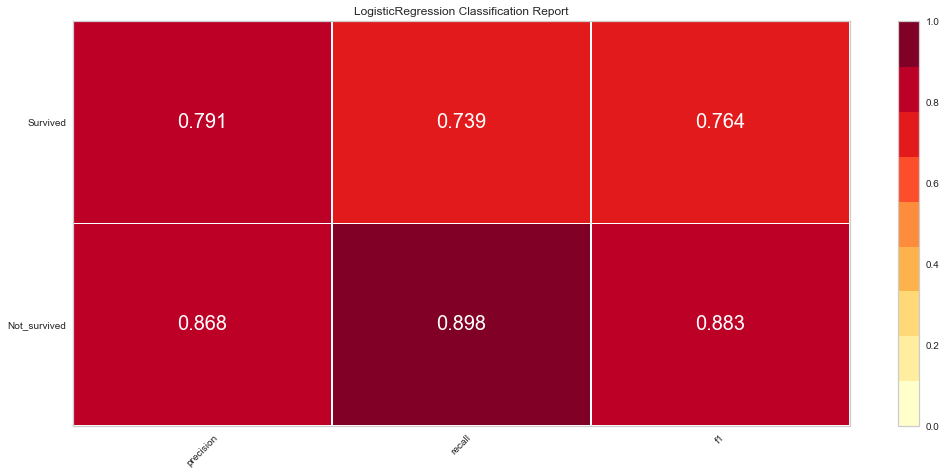

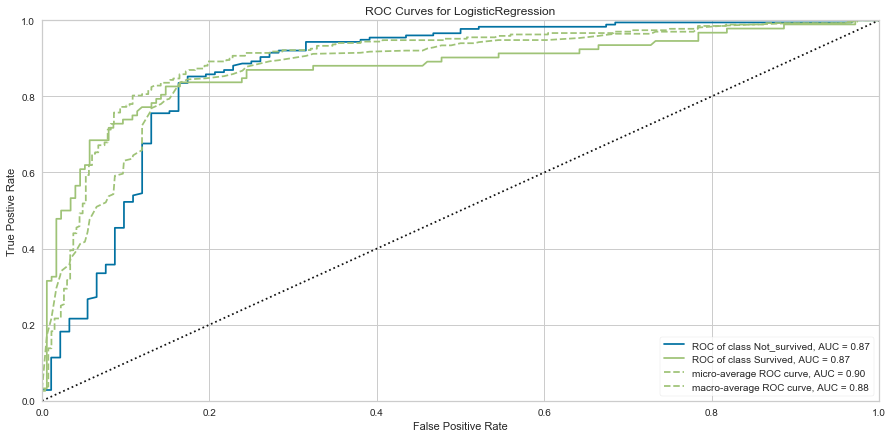

In [41]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


The results obtained for the Precision, Recall and F1 are not bad at all, all values are around 0.793 - 0.83 what it means that our model does pretty good predicting. Curiously is that the model does better prediting Not Survivors than the actual survivors. https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/


The ROC curve shows us a good model, it has a AUCROC of 0.87 that is close to one, we can asume (always depending on our goal) that the model is a good model. This value represents the area under the curve the closer to 1 the better the model is (Albon, 2018. p.192)